In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def decaying_sinusoidal(tau, parameters):
## Decaying sinusoidal function as model of wakefield
    A = parameters[0]
    decay_time = parameters[1]
    angular_frequency = parameters[2]
    init_phase = parameters[3]
    return A*np.exp(-tau/decay_time)*np.sin(angular_frequency*1e-12*tau+init_phase)

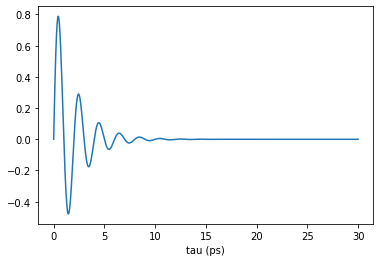

In [34]:
#filename of Wakefield function
fname = "./configs/Wakefield.txt"
# defining parameters of wavetrain
Amplitude = 1 #Amplitude of decaying wave train
decay_time = 2   # decay time of wavetrain in picoseconds
angular_freq = 2*np.pi*500*1E9 # angular frequency of wavetrain in Hz
initial_phase = 0 # inital phase of wavetrain in radians
parameters = [Amplitude, decay_time, angular_freq,initial_phase]
# defining tau grid
# min tau MUST be 0
# tau in units of picoseconds
tau_grid = np.linspace(0,30,2000)
# calculating values of wakefield
values = decaying_sinusoidal(tau_grid,parameters)
data = pd.DataFrame(np.array([tau_grid,values]))
data = data.T
data.to_csv(fname,sep=",", index=False)
plt.xlabel("tau (ps)")
plt.plot(tau_grid,values)
plt.show()